<a href="https://colab.research.google.com/github/pranavi2013/2203a52118/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

In [28]:
data=pd.read_csv("/content/breast_cancer_survival.csv")
print(data)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [29]:
data['Patient_Status'] = data['Patient_Status'].map({'Alive': 1, 'Dead': 0})
data['HER2 status'] = data['HER2 status'].map({'Positive': 1, 'Negative': 0})
data = data.fillna(data.mean())
columns_to_drop = ['Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', 'Tumour_Stage', 'Gender','ER status','PR status']
data = data.drop(columns=columns_to_drop)
print(data)


     Age  Protein1  Protein2  Protein3  Protein4  HER2 status  Patient_Status
0     42  0.952560   2.15000  0.007972 -0.048340            0             1.0
1     54  0.000000   1.38020 -0.498030 -0.507320            0             0.0
2     63 -0.523030   1.76400 -0.370190  0.010815            0             1.0
3     78 -0.876180   0.12943 -0.370380  0.132190            0             1.0
4     42  0.226110   1.74910 -0.543970 -0.390210            1             1.0
..   ...       ...       ...       ...       ...          ...             ...
329   59  0.024598   1.40050  0.024751  0.280320            1             1.0
330   41  0.100120  -0.46547  0.472370 -0.523870            1             1.0
331   54  0.753820   1.64250 -0.332850  0.857860            0             0.0
332   74  0.972510   1.42680 -0.366570 -0.107820            0             1.0
333   66  0.286380   1.39980  0.318830  0.836050            0             0.0

[334 rows x 7 columns]


<ipython-input-29-057f8ac67435>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [30]:
if data['Patient_Status'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
features = data.drop("Patient_Status", axis=1)
target = data["Patient_Status"].astype(int)
print(features)
print(target)

     Age  Protein1  Protein2  Protein3  Protein4  HER2 status
0     42  0.952560   2.15000  0.007972 -0.048340            0
1     54  0.000000   1.38020 -0.498030 -0.507320            0
2     63 -0.523030   1.76400 -0.370190  0.010815            0
3     78 -0.876180   0.12943 -0.370380  0.132190            0
4     42  0.226110   1.74910 -0.543970 -0.390210            1
..   ...       ...       ...       ...       ...          ...
329   59  0.024598   1.40050  0.024751  0.280320            1
330   41  0.100120  -0.46547  0.472370 -0.523870            1
331   54  0.753820   1.64250 -0.332850  0.857860            0
332   74  0.972510   1.42680 -0.366570 -0.107820            0
333   66  0.286380   1.39980  0.318830  0.836050            0

[334 rows x 6 columns]
0      1
1      0
2      1
3      1
4      1
      ..
329    1
330    1
331    0
332    1
333    0
Name: Patient_Status, Length: 334, dtype: int64


[0.582089552238806, 0.746268656716418, 0.6567164179104478, 0.7014925373134329, 0.6865671641791045, 0.7164179104477612, 0.746268656716418, 0.7313432835820896, 0.746268656716418, 0.7611940298507462, 0.7761194029850746, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462, 0.7611940298507462]


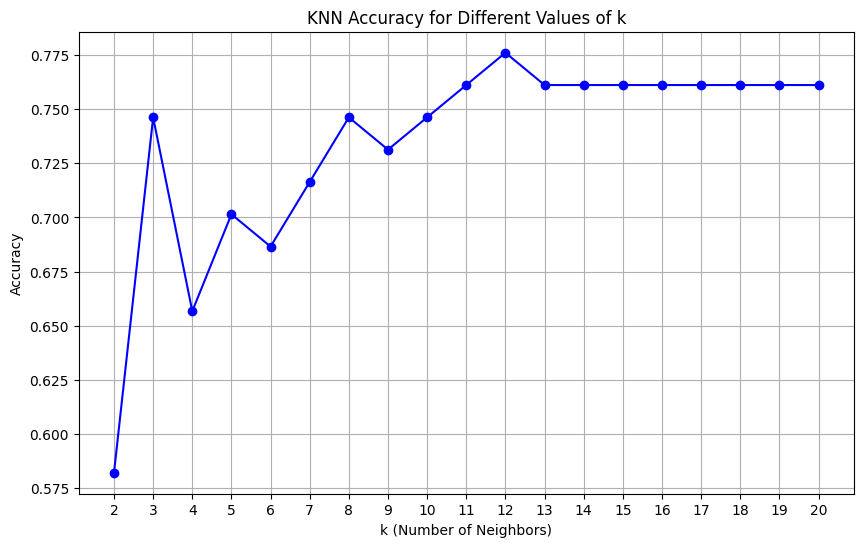

AT K=12 IAM GETTING GOOD ACUURACY


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=55)
k_values = list(range(2, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("AT K=12 IAM GETTING GOOD ACUURACY")

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7611940298507462
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.77      0.98      0.86        52

    accuracy                           0.76        67
   macro avg       0.39      0.49      0.43        67
weighted avg       0.60      0.76      0.67        67



In [53]:
a=pd.read_csv("/content/Japan_life_expectancy.csv")
print(a)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

In [54]:
df= a.drop('Prefecture', axis=1)
print(df)

    Life_expectancy  Physician  Junior_col  University  Public_Hosp  \
0             84.65      224.4        13.6        23.7         13.7   
1             83.79      242.6        11.3        11.9         34.0   
2             82.80      212.5        11.4        11.8         42.9   
3             84.48      205.8        14.7        24.9         16.1   
4             84.24      276.7        14.2        18.0         17.4   
5             84.91      257.9        12.9        18.8         22.8   
6             84.54      309.9        14.2        20.4          8.9   
7             83.71      205.7        11.6        13.1         20.6   
8             84.71      224.5        13.4        18.5         24.7   
9             84.16      233.8        14.7        17.5         16.5   
10            85.06      267.1        16.1        23.1         14.1   
11            84.00      251.3        14.1        14.4         21.1   
12            84.81      266.1        13.7        24.5         16.6   
13    

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
features = df.drop('Welfare_exp', axis=1)
target = df['Welfare_exp']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.4945812000000003


[3.8392899999999996, 1.7531450000000013, 1.6405455555555553, 1.306263125, 1.4945812000000003, 1.832891944444445, 1.8140118367346953, 1.5048706250000008, 1.3321198765432112, 1.4521032000000011, 1.3087303305785125, 1.5481913194444452, 1.5298179289940843, 1.7331903571428573, 1.732068488888889, 1.7546519140625012, 1.578971972318338, 1.5578841049382721, 1.6703993905817185, 1.7192291250000014]


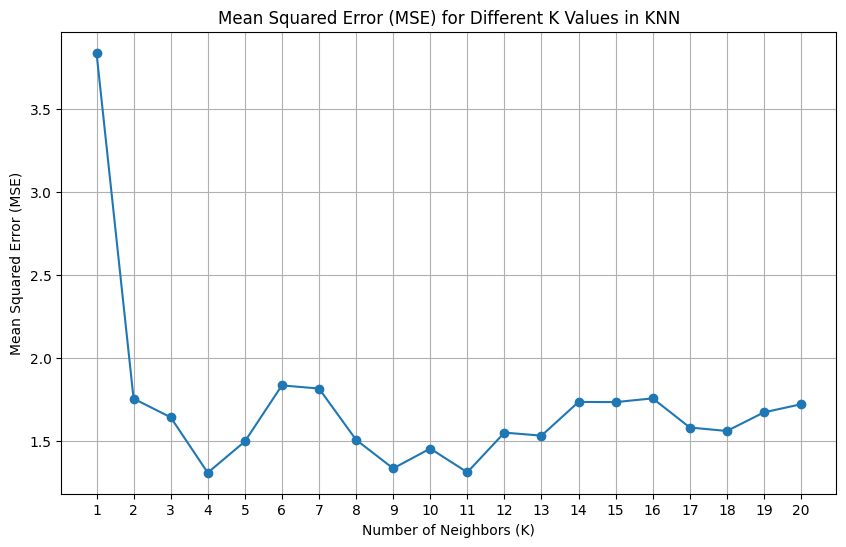

AT K=1 WE GOT HIGH ACURRACY


In [60]:
import matplotlib.pyplot as plt
k_values = list(range(1, 21))
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print(mse_values)
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('Mean Squared Error (MSE) for Different K Values in KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
print("AT K=1 WE GOT HIGH ACURRACY")